In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
import requests

In [2]:
url = 'https://raw.githubusercontent.com/aakashratha1006/Human-Activity-Recognition/refs/heads/main/Dataset/WISDM_ar_v1.1_raw.txt'

response = requests.get(url)
text_data = response.text

print(text_data[:500])

33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;
33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172;
33,Jogging,49106332290000,-1.1849703,12.108489,7.205164;
33,Jogging,49106442306000,1.3756552,-2.4925237,-6.510526;
33,Jogging,49106542312000,-0.61291564,10.56939,5.706926;
33,Jogging,49106652389000,-0.50395286,13.947236,7.0553403;
33,Jogging,49106762313000,-8.430995,


In [4]:
lines = text_data.split('\n')

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [5]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [8]:
df = pd.DataFrame(processedList, columns=['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'])

In [9]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [10]:
df.shape

(343416, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user       343416 non-null  object
 1   activity   343416 non-null  object
 2   timestamp  343416 non-null  object
 3   x-axis     343416 non-null  object
 4   y-axis     343416 non-null  object
 5   z-axis     343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [12]:
df.isnull().sum()

,0
user,0
activity,0
timestamp,0
x-axis,0
y-axis,0
z-axis,0


In [13]:
df['activity'].value_counts()

,count
activity,
Walking,137375
Jogging,129392
Upstairs,35137
Downstairs,33358
Sitting,4599
Standing,3555


In [14]:
# to get data balance
df['x-axis'] = df['x-axis'].astype(float)
df['y-axis'] = df['y-axis'].astype(float)
df['z-axis'] = df['z-axis'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user       343416 non-null  object 
 1   activity   343416 non-null  object 
 2   timestamp  343416 non-null  object 
 3   x-axis     343416 non-null  float64
 4   y-axis     343416 non-null  float64
 5   z-axis     343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


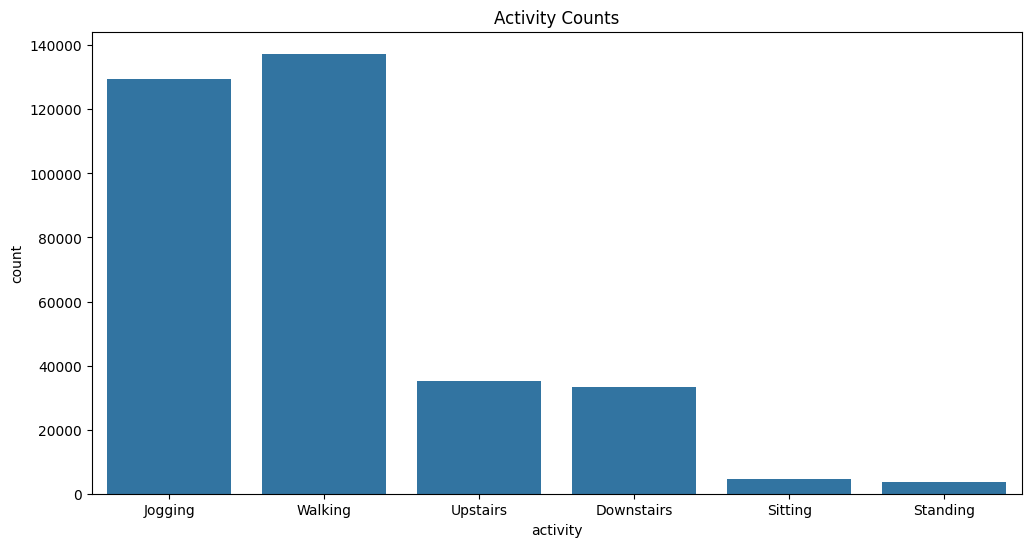

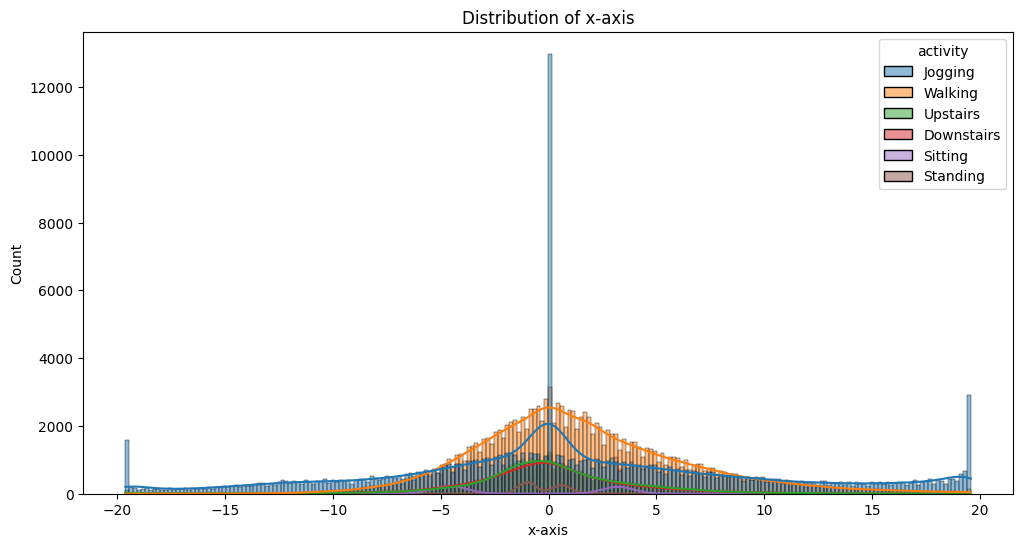

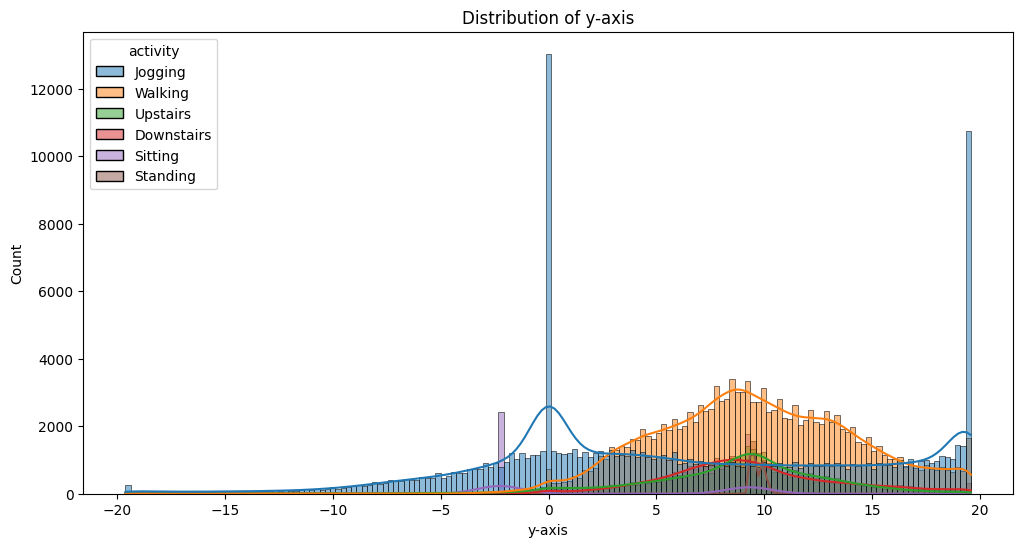

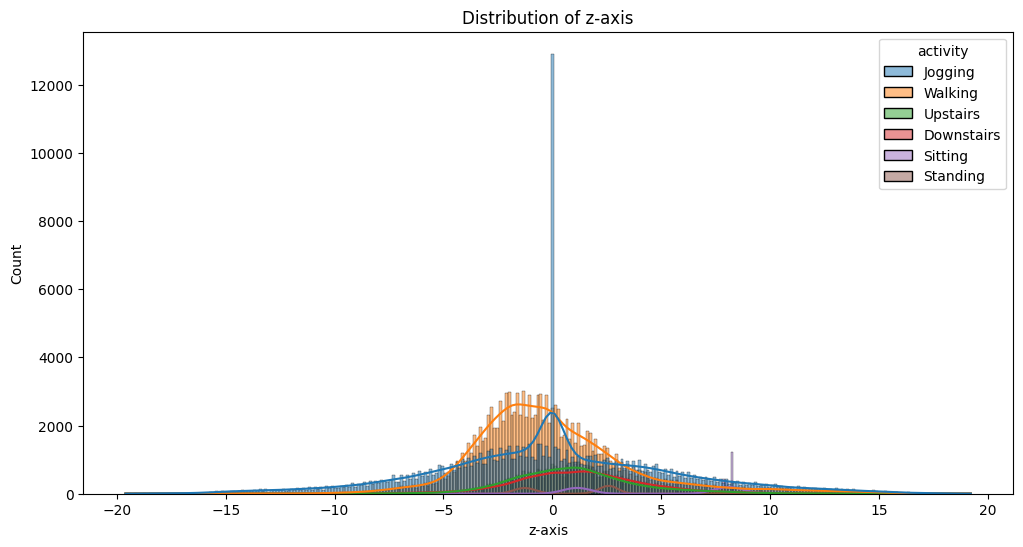

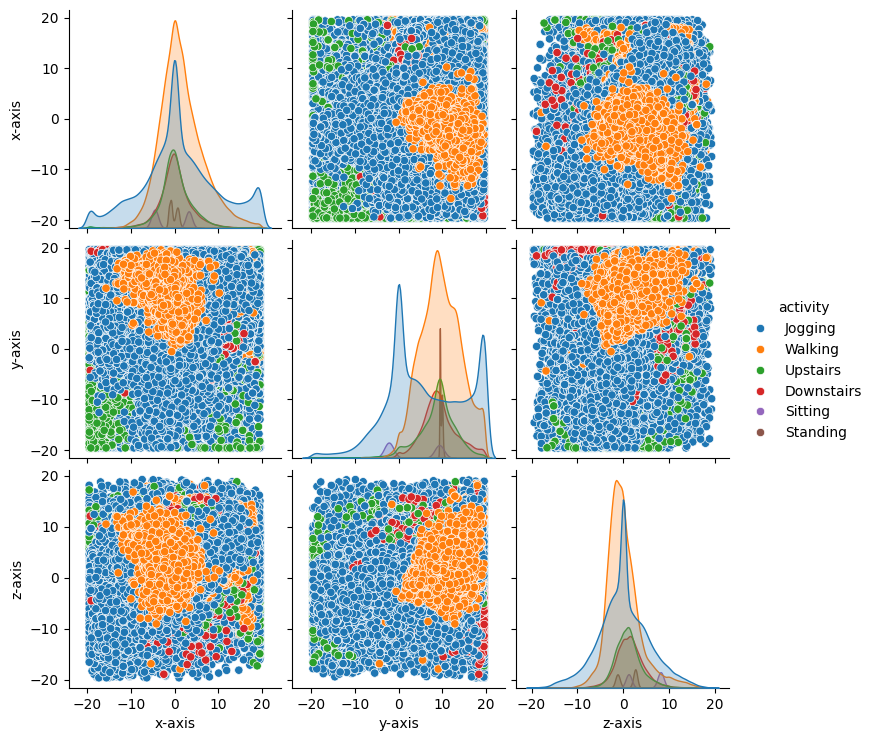

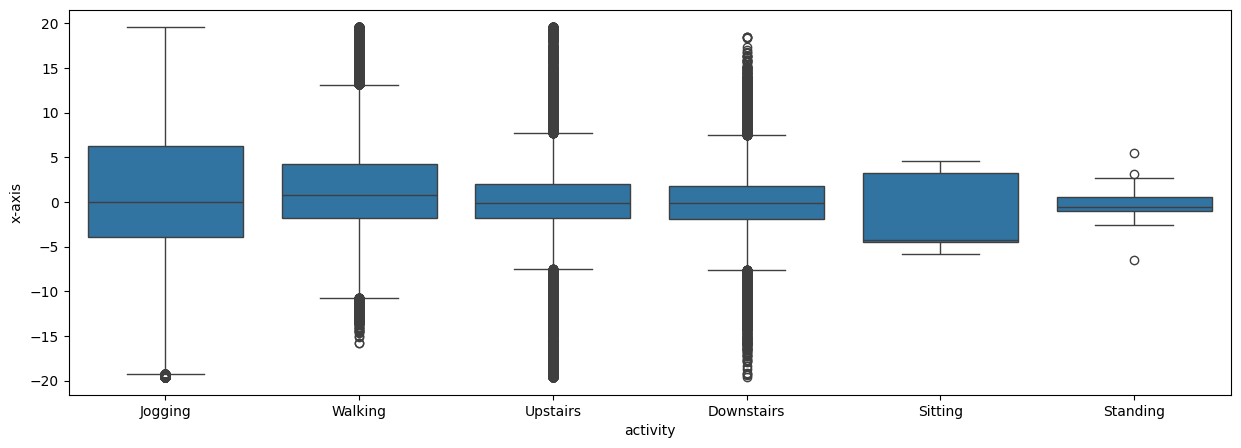

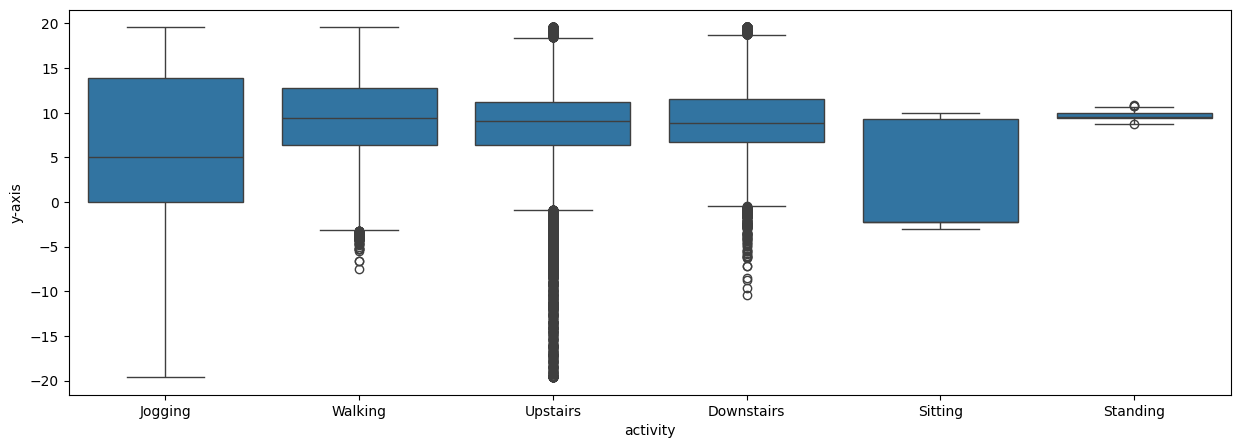

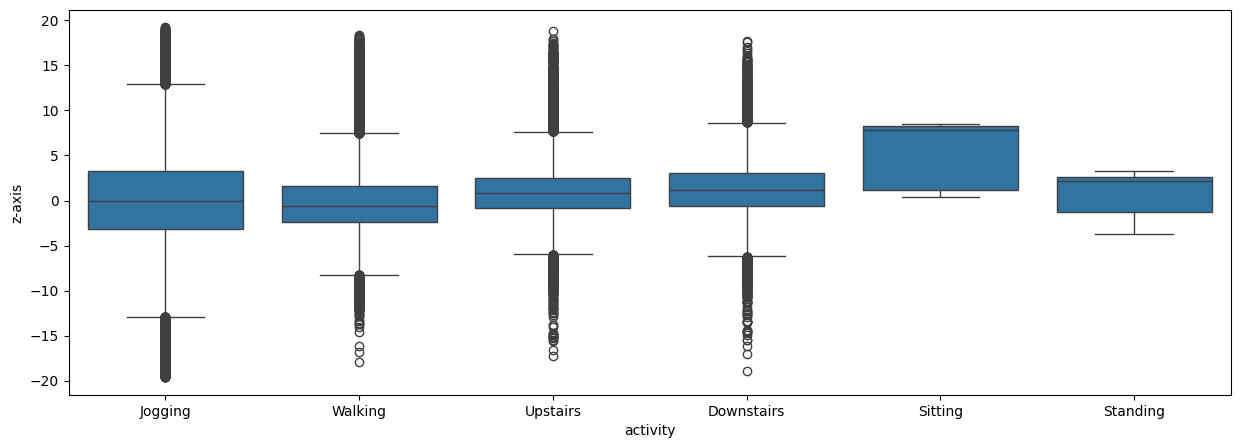

In [16]:
# Visualize activity counts
plt.figure(figsize=(12, 6))
sns.countplot(x='activity', data=df)
plt.title('Activity Counts')
plt.show()

# Visualize data distribution for each axis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='x-axis', hue='activity', kde=True)
plt.title('Distribution of x-axis')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='y-axis', hue='activity', kde=True)
plt.title('Distribution of y-axis')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='z-axis', hue='activity', kde=True)
plt.title('Distribution of z-axis')
plt.show()


# Example of visualizing relationships between axes (pairplot)
sns.pairplot(df, hue='activity', vars=['x-axis', 'y-axis', 'z-axis'], diag_kind='kde')
plt.show()

# Boxplots to see the distribution of each axis across different activities
plt.figure(figsize=(15, 5))
sns.boxplot(x='activity', y='x-axis', data=df)
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='activity', y='y-axis', data=df)
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='activity', y='z-axis', data=df)
plt.show()


In [17]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

In [19]:
balanced_df = pd.concat([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing], ignore_index=True)
balanced_df.shape

(21330, 6)

In [21]:
balanced_df['activity'].value_counts()

,count
activity,
Walking,3555
Jogging,3555
Upstairs,3555
Downstairs,3555
Sitting,3555
Standing,3555
